Predicting Ad Clicks

1. Project Overview/Introduction
    Problem Statement: As a new runner, I don’t know how to improve my performance.
    Objective: Identify patterns in my running performance over time.
    Scope: Data collected from Strava API, potentially add FitNotes next
    Impact: Identifying patterns in my running performance could unlock new training opportunities that improve my performance.


2. Data Exploration

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset into a DataFrame and save in a variable
data = pd.read_csv(r'C:\Users\brand\Downloads\advertising.csv')

In [3]:
# Gather basic information about the data
# Display the first 10 rows of the data
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# Gather descriptive statistics about the data
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
# Gather basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


Text(0.5, 0, 'Age')

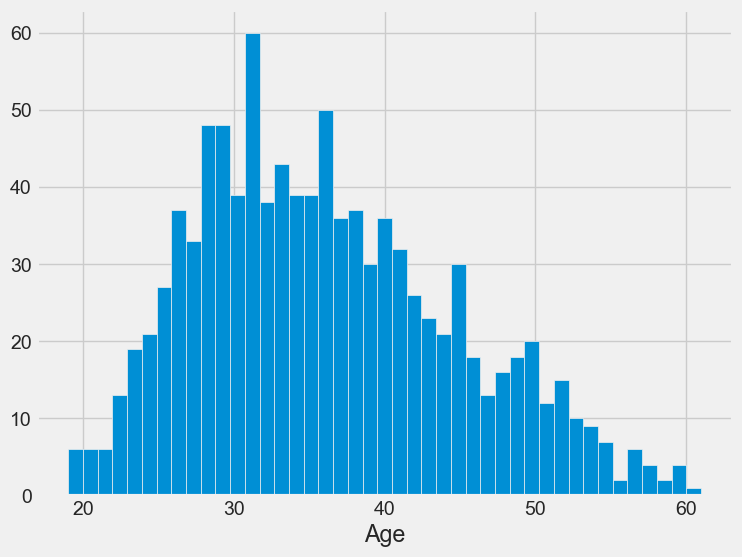

In [6]:
plt.figure(figsize=(8, 6))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

Next let's look at correlation between variables

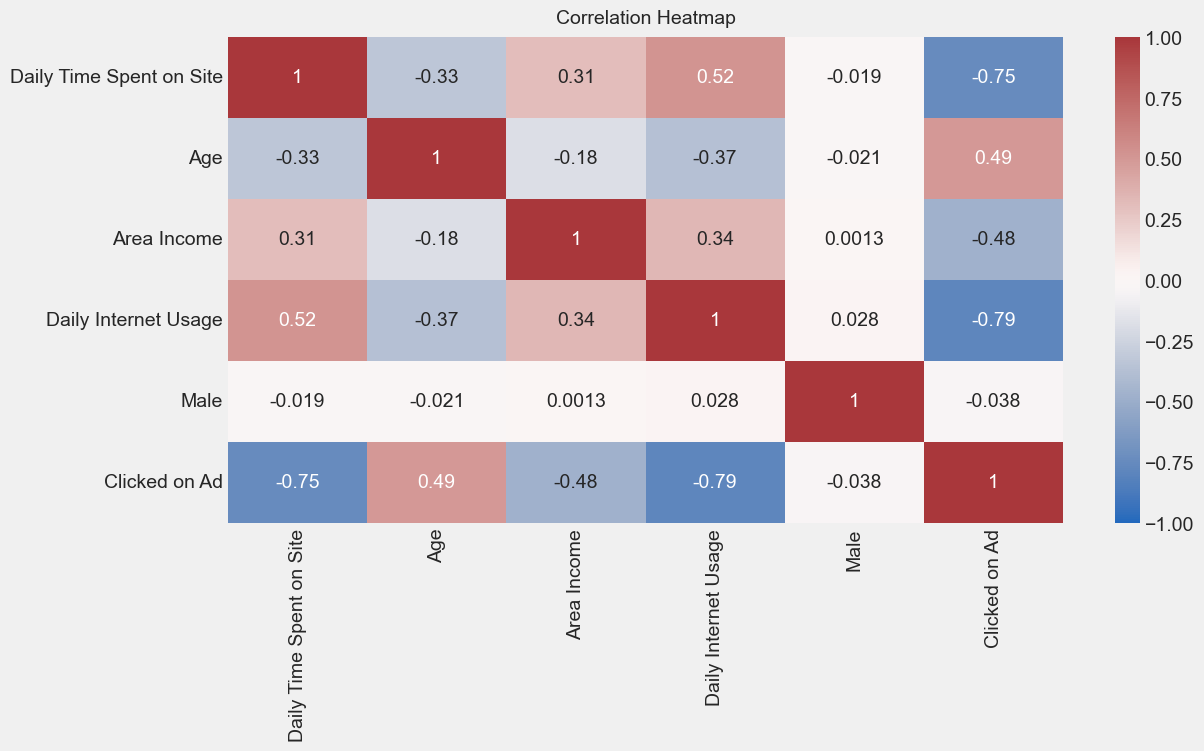

In [7]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 6))

heatmap = sns.heatmap(
    data= data.select_dtypes(include='number').corr(), 
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap=sns.color_palette("vlag", as_cmap=True)
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

In [14]:
# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [10]:
# Fit a LogisticRegression model to the training data
clf = LogisticRegression().fit(X_train,y_train)

In [11]:
# Predict the outcome for the test dataset
# Save predictions and print predictions
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0]


In [13]:
# Analyze the results by printing accuracy, precision, recall and F1 score
import sklearn.metrics as metrics
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.970000
Precision: 0.980132
Recall: 0.961039
F1 Score: 0.970492


In [15]:
# Retrieve feature coefficients (scores)
feature_scores = clf.coef_[0]

# Create feature names (for demonstration purposes)
feature_names = [f"feature_{i}" for i in range(X.shape[1])]

# Print feature scores alongside feature names
for name, score in zip(feature_names, feature_scores):
    print(f"{name}: {score:.3f}")

feature_0: -0.633
feature_1: 0.259
feature_2: -0.317
feature_3: -0.686
feature_4: -0.142


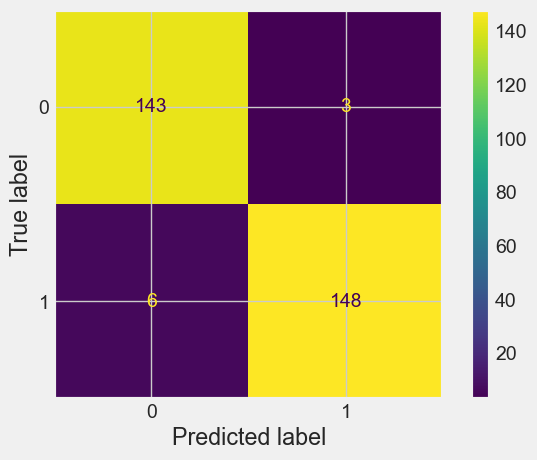

In [19]:
# Produce a confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()